# Working with pandas aggregation
For starters, let's import some required libraries

In [1]:
import pandas as pd

Then, let's introduce some data (in this case, some weight recordings over time)

In [9]:
weight_data = pd.read_csv('weights.csv')
weight_data['date'] = pd.to_datetime(weight_data['date'])
weight_data

,date,TOD,weight,bmi,fat
0,2015-01-09 14:00:00+00:00,PM,86.363917,27.880,24.711000
1,2015-01-09 23:00:00+00:00,PM,86.091762,27.800,22.131001
2,2015-01-10 09:00:00+00:00,AM,85.910325,27.740,21.806999
3,2015-01-10 22:00:00+00:00,PM,85.502092,27.610,20.952000
4,2015-01-11 07:00:00+00:00,AM,85.502092,27.610,21.162001
...,...,...,...,...,...
3817,2021-06-27 08:00:00+00:00,AM,75.341631,24.330,17.181999
3818,2021-06-27 12:00:00+00:00,AM,73.451665,23.720,17.105333
3819,2021-06-28 07:00:00+00:00,AM,75.545748,24.395,16.941999
3820,2021-06-29 07:00:00+00:00,AM,75.840582,24.490,16.822001


There's way too many readings in this data, let's take a single average reading for a given day, and then work from there. We do this by aggregating all the readings for a given day, and then computing the mean weight value for each group. First, let's work out how to get a date value rounded to the nearest day (check out the [floor()](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.floor.html) function for this):

In [10]:
weight_data['date'].dt.floor('D')

0      2015-01-09 00:00:00+00:00
1      2015-01-09 00:00:00+00:00
2      2015-01-10 00:00:00+00:00
3      2015-01-10 00:00:00+00:00
4      2015-01-11 00:00:00+00:00
                  ...           
3817   2021-06-27 00:00:00+00:00
3818   2021-06-27 00:00:00+00:00
3819   2021-06-28 00:00:00+00:00
3820   2021-06-29 00:00:00+00:00
3821   2021-06-29 00:00:00+00:00
Name: date, Length: 3822, dtype: datetime64[ns, UTC]

That looks like it'll do the trick. Let's group our whole data set by these rounded values, and then from there compute the mean reading for each day:

In [5]:
daily_trend = weight_data.groupby(weight_data['date'].dt.floor('D'))[['weight']].mean()
daily_trend

,weight
date,
2015-01-09 00:00:00+00:00,86.227839
2015-01-10 00:00:00+00:00,85.706208
2015-01-11 00:00:00+00:00,85.978364
2015-01-12 00:00:00+00:00,86.772150
2015-01-13 00:00:00+00:00,86.046402
...,...
2021-06-25 00:00:00+00:00,75.296272
2021-06-26 00:00:00+00:00,75.273592
2021-06-27 00:00:00+00:00,74.396648


Let's see what the data looks like over time. pandas provides a simple plot interface which is pretty useful (we'll use more elaborate plotting tools in labs, where appropriate, but this kind of plotting is VERY useful for diagnostics!):

<AxesSubplot:xlabel='date'>

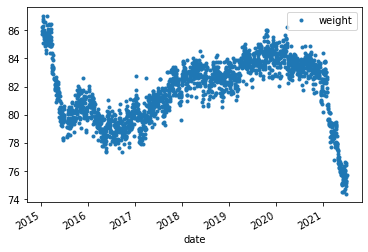

In [6]:
daily_trend.plot(style='.')

Note that the readings also include a 'TOD' entry, which indicates if the reading was taken before or after 12pm. Let's apply a filter to our data, so that we only keep the PM readings:

In [7]:
evening_readings = weight_data[weight_data['TOD']=='PM'].groupby(weight_data['date'].dt.floor('D'))[['weight']].mean()
evening_readings

,weight
date,
2015-01-09 00:00:00+00:00,86.227839
2015-01-10 00:00:00+00:00,85.502092
2015-01-11 00:00:00+00:00,86.454635
2015-01-12 00:00:00+00:00,86.726790
2015-01-13 00:00:00+00:00,86.137121
...,...
2021-06-06 00:00:00+00:00,75.069476
2021-06-08 00:00:00+00:00,76.248815
2021-06-09 00:00:00+00:00,74.207651


And let's plot that:

<AxesSubplot:xlabel='date'>

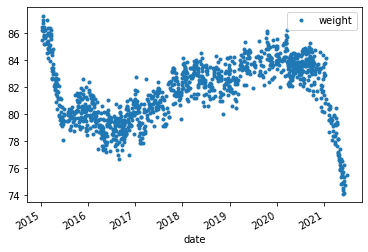

In [8]:
evening_readings.plot(style='.')